4.10.7 Departments Exploration Analysis

# Outline

1. Outline

2. Import

3. Analysis

    3.1  Order Freq. by Department Bar Chart

    3.2 Sales by Department Bar Chart

    3.3  Order Frequncey by Department and Region

    3.4  Order Frequncey by Loyalty

4. Export

    4.1  PNGs

# Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#POC DF with Region Asignment
df1 = pd.read_pickle ('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/Poc DF with Region.pkl')

In [3]:
#POC DF Grouped by UserID
df2 = pd.read_pickle ('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/Poc DF Grouped by UserId.pkl')

In [4]:
#Department ID DF
dep = pd.read_csv ('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Orginal Data/departments.csv')

In [5]:
import matplotlib.ticker as mtick

# Analysis

## Order Freq. by Department Bar Chart

In [6]:
dep_count = df1.groupby('department_id').size()

In [7]:
dep_count

department_id
1     2113059
2       34035
3     1108540
4     8963496
5      146535
6      254641
7     2540159
8       92253
9      819814
10      32612
11     421568
12     671242
13    1771171
14     663250
15    1009660
16    5101185
17     696686
18     400378
19    2730482
20     993564
21      65411
dtype: int64

In [8]:
merged_df = pd.merge(dep, dep_count.to_frame(), left_on='department_number', right_on='department_id')

In [9]:
merged_df = merged_df.rename(columns={merged_df.columns[2]: 'order_count'})

In [10]:
merged_df

,department_number,department_name,order_count
0,1,frozen,2113059
1,2,other,34035
2,3,bakery,1108540
3,4,produce,8963496
4,5,alcohol,146535
5,6,international,254641
6,7,beverages,2540159
7,8,pets,92253
8,9,dry goods pasta,819814
9,10,bulk,32612


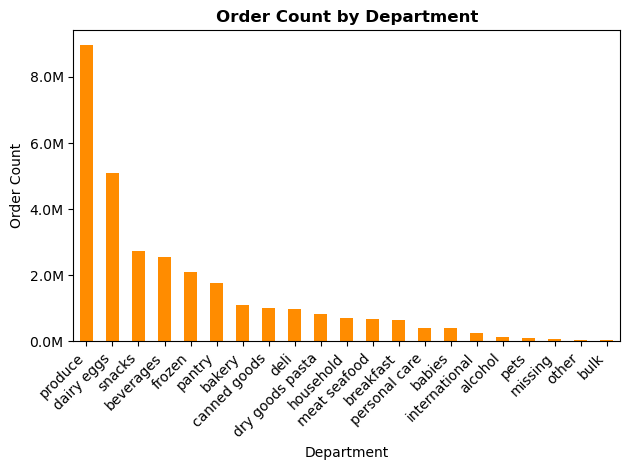

In [11]:
#Order Freq by Department; Bar Chart
pic6 = merged_df.sort_values(by='order_count', ascending=False).plot.bar(x='department_name', y='order_count', legend=False, color='darkorange')
plt.title('Order Count by Department', fontweight='bold')
pic6.set_xlabel('Department')
pic6.set_ylabel('Order Count')

pic6.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Sales by Department Bar Chart

In [12]:
dep_sum = df1.groupby('department_id')['prices'].sum()

In [13]:
dep_sum

department_id
1      16348413.9
2        239126.0
3       8706018.0
4      71546092.9
5       1194087.1
6       1955998.3
7      19513755.2
8        727371.5
9       6028663.7
10       272548.0
11      3369782.1
12     10938831.8
13     14181842.4
14      5325016.5
15      7613764.0
16    168872662.3
17      5142731.5
18      3059970.5
19     11675580.4
20      7729660.9
21       566239.6
Name: prices, dtype: float64

In [14]:
merged_df2 = pd.merge(dep, dep_sum.to_frame(), left_on='department_number', right_on='department_id')

In [15]:
merged_df2 = merged_df2.rename(columns={merged_df.columns[2]: 'sales_sum'})

In [16]:
merged_df2

,department_number,department_name,prices
0,1,frozen,16348413.9
1,2,other,239126.0
2,3,bakery,8706018.0
3,4,produce,71546092.9
4,5,alcohol,1194087.1
5,6,international,1955998.3
6,7,beverages,19513755.2
7,8,pets,727371.5
8,9,dry goods pasta,6028663.7
9,10,bulk,272548.0


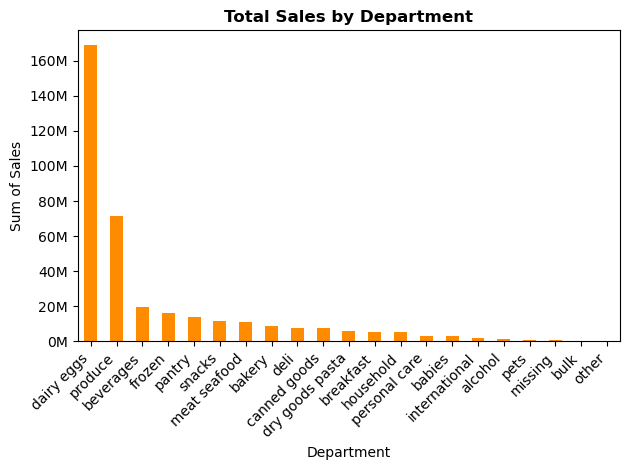

In [17]:
#Total Sales by Department; Bar Chart
pic1 = merged_df2.sort_values(by='prices', ascending=False).plot.bar(x='department_name', y='prices', legend=False, color='darkorange')
plt.title('Total Sales by Department', fontweight='bold')
pic1.set_xlabel('Department')
pic1.set_ylabel('Sum of Sales')

pic1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}M'.format(x*1e-6)))

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Order Frequncey by Department and Region

In [18]:
sss = df1.groupby('region')['department_id'].value_counts()

In [19]:
sss

region  department_id
1       4                1581498
        16                901214
        19                487604
        7                 457231
        1                 369916
                          ...   
4       5                  37423
        8                  24136
        21                 16138
        10                  8593
        2                   8563
Name: department_id, Length: 84, dtype: int64

In [20]:
sss.shape

(84,)

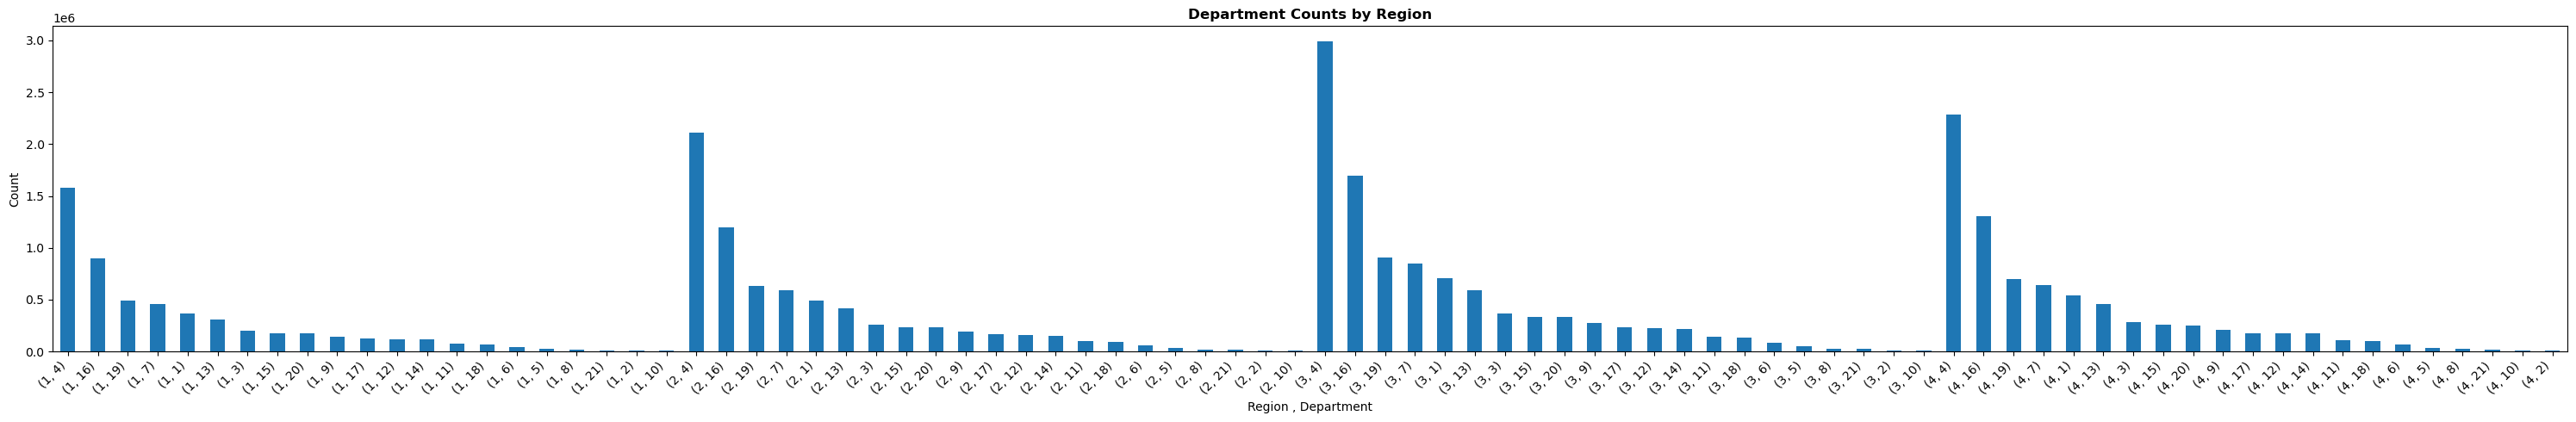

In [21]:
#not exported
sss.plot(kind='bar', figsize=(30, 5))
plt.title('Department Counts by Region', fontweight='bold')
plt.xlabel('Region , Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
reg1 = sss[sss.index.get_level_values('region') == 1]

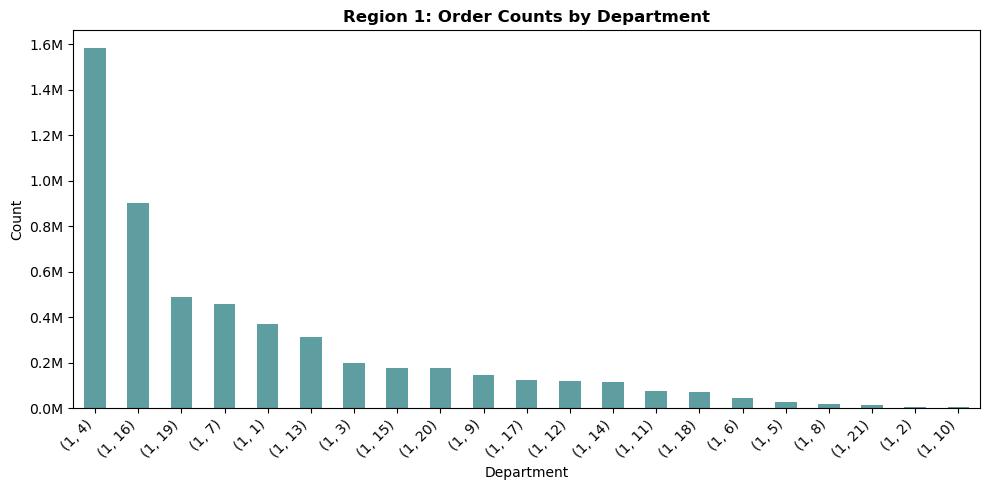

In [23]:
pic7 = reg1.plot(kind='bar', figsize=(10, 5), color=['cadetblue'])
plt.title('Region 1: Order Counts by Department', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
pic7.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))
plt.tight_layout()
plt.show()

In [24]:
reg2 = sss[sss.index.get_level_values('region') == 2]

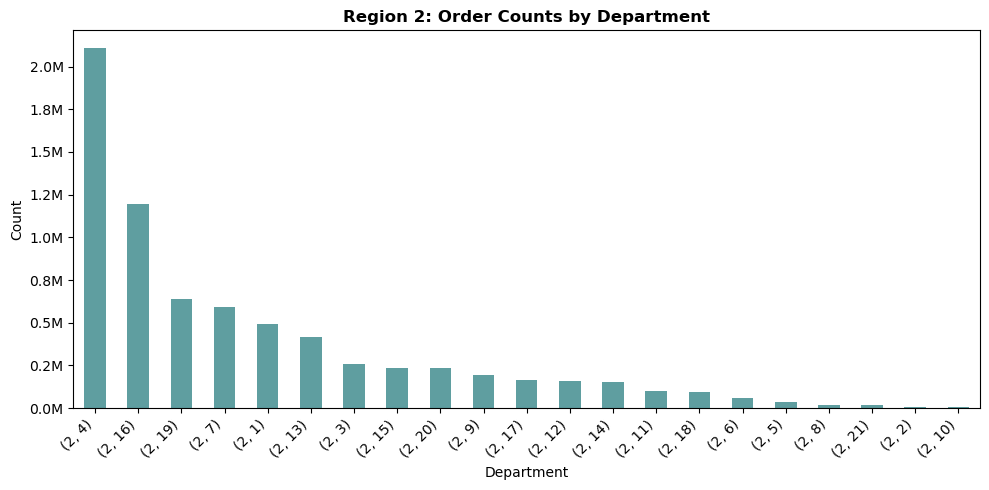

In [25]:
pic8 = reg2.plot(kind='bar', figsize=(10, 5), color=['cadetblue'])
plt.title('Region 2: Order Counts by Department', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
pic8.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))
plt.tight_layout()
plt.show()

In [26]:
reg3 = sss[sss.index.get_level_values('region') == 3]

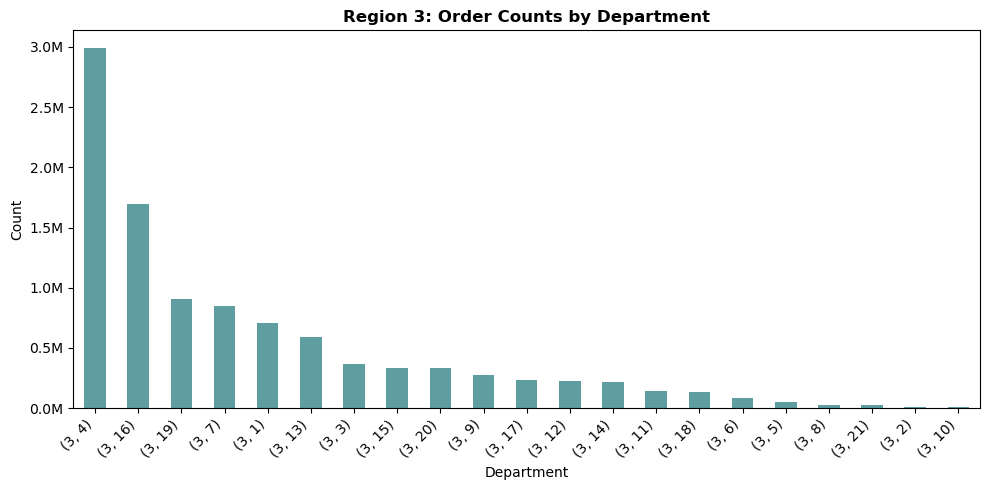

In [27]:
pic9 = reg3.plot(kind='bar', figsize=(10, 5), color=['cadetblue'])
plt.title('Region 3: Order Counts by Department', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
pic9.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))
plt.tight_layout()
plt.show()

In [28]:
reg4 = sss[sss.index.get_level_values('region') == 4]

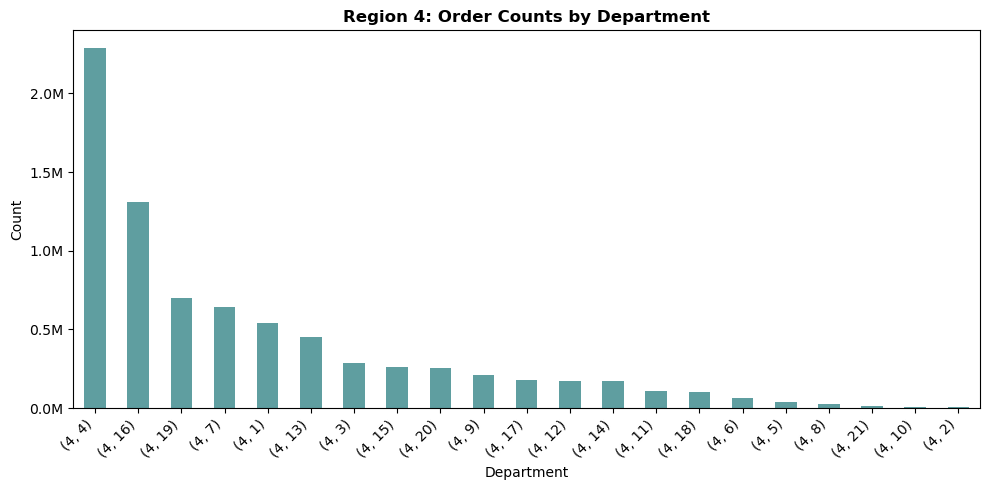

In [29]:
pic10 = reg4.plot(kind='bar', figsize=(10, 5), color=['cadetblue'])
plt.title('Region 4: Order Counts by Department', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
pic10.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))
plt.tight_layout()
plt.show()

## Order Frequncey by Loyalty

In [30]:
xxx = df1.groupby('loyalty_flag')['prices'].sum()

In [31]:
xxx

loyalty_flag
Loyal Customer      100311586.6
New Customer         78119361.3
Regular Customer    186577208.7
Name: prices, dtype: float64

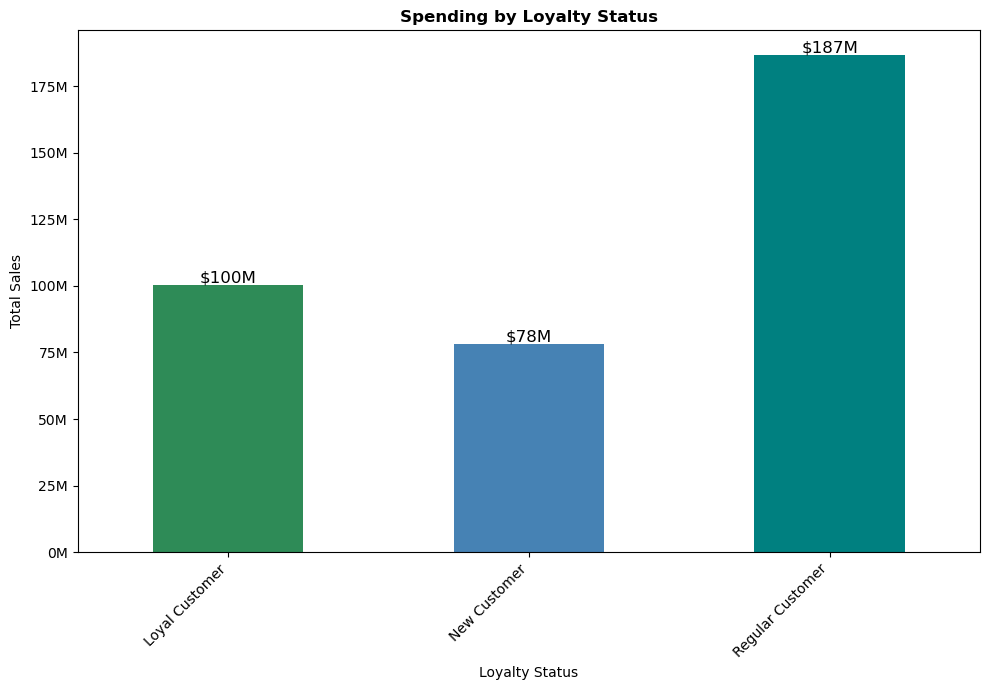

In [32]:
pic11 = xxx.plot(kind='bar', figsize=(10, 7), color=['seagreen', 'steelblue', 'teal'])
plt.title('Spending by Loyalty Status', fontweight='bold')
plt.xlabel('Loyalty Status')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
pic11.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}M'.format(x*1e-6)))

for i, v in enumerate(xxx):
    pic11.text(i, v+1000000, '${:,.0f}M'.format(v*1e-6), fontsize=12, ha='center')

plt.tight_layout()
plt.show()

# Export

## PNGs

In [33]:
#Order Frequency by Department; Bar Chart
pic6.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Order Frequency by Department; Bar Chart.png'))

In [34]:
#Total Sales by Department; Bar Chart
pic1.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Total Sales by Department; Bar Chart.png'))

In [35]:
#Region 1: Order Counts by Department; Bar Chart
pic7.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Region 1: Order Counts by Department; Bar Chart.png'))

In [36]:
#Region 2: Order Counts by Department; Bar Chart
pic8.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Region 2: Order Counts by Department; Bar Chart.png'))

In [37]:
#Region 3: Order Counts by Department; Bar Chart
pic9.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Region 3: Order Counts by Department; Bar Chart.png'))

In [38]:
#Region 4: Order Counts by Department; Bar Chart
pic10.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Region 4: Order Counts by Department; Bar Chart.png'))

In [39]:
#Spending by Loyalty Status; Bar Chart
pic11.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Spending by Loyalty Status; Bar Chart.png'))